# 글로벌 데이터 01 - FRED

<img src="http://i.imgur.com/grQHNKG.jpg">
    
#### 2018 FinanceData http://fb.com/financedata

In [15]:
%matplotlib inline

# pandas_datareader
* https://pypi.python.org/pypi/pandas-datareader
* https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
* https://github.com/pydata/pandas-datareader

    $ sudo pip install pandas_datareader

# 원/달러 환율

https://research.stlouisfed.org/fred2/series/DEXKOUS

* DEXKOUS - Daily Exchange KO-US
* EXKOUS - Monthly Exchange KO-US
* AEXKOUS - Annual Exchange KO-US

In [16]:
import pandas_datareader as pdr

df_kous = pdr.DataReader("DEXKOUS", 'fred', '2017-01-01', '2017-12-31')
df_kous.tail(10)

,DEXKOUS
DATE,
2017-12-18,1084.28
2017-12-19,1084.29
2017-12-20,1078.14
2017-12-21,1078.08
2017-12-22,1076.87
2017-12-25,NaN
2017-12-26,1073.75
2017-12-27,1073.13
2017-12-28,1068.64


# 2017년 원/달러 환율 추이

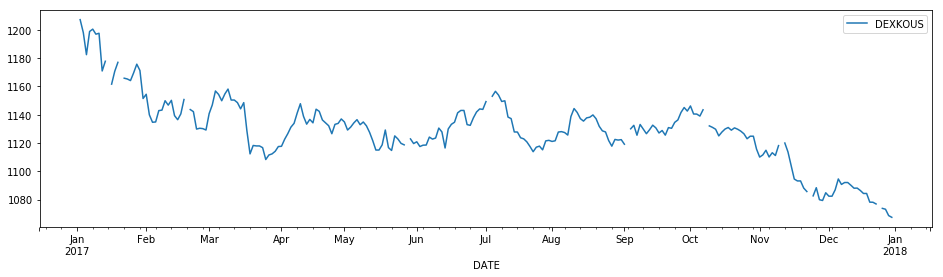

In [17]:
%matplotlib inline

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2017, 12, 31)

df_kous = pdr.DataReader("DEXKOUS", 'fred', start, end)
df_kous.plot(figsize=(16,4))

# 1980~2017 원달러 환율

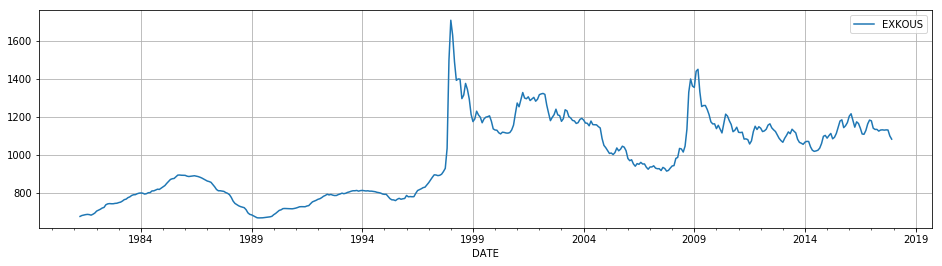

In [18]:
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2017, 12, 31)

df_kous = pdr.DataReader("EXKOUS", 'fred', start, end)
df_kous.plot(figsize=(16,4), grid=True)

# 달러 환율

https://research.stlouisfed.org/fred2/series/DEXUSEU

* DEXUSEU - Daily US / EU
* DEXCHUS - Daily China / US
* DEXJPUS - Daily Japan / US

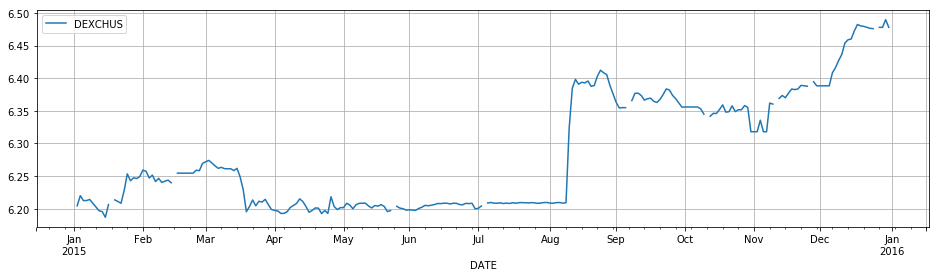

In [19]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_chus = pdr.DataReader("DEXCHUS", 'fred', start, end)
df_chus.plot(figsize=(16,4), grid=True)

https://goo.gl/zPqs4m  2015-08-12 중국 위안화 평가절하, 세계 금융시장 출렁

# 한국, 소비자 물가 지수

* https://research.stlouisfed.org/fred2/series/KORCPIALLMINMEI
* 2010년을 100으로 481개 조사항목을 가중평균하여 매월 지수를 산출

## 부문별 소비자 물가 지수
* KORCPIALLMINMEI : CPI (All Items)
* KORCPIHOUMINMEI : CPI (Housing)
* KORCPIENGMINMEI : CPI (Energy)
* KORCPIFODMINMEI : CPI (Food)
    

In [20]:
inx_codes = ["KORCPIALLMINMEI", "KORCPIHOUMINMEI", "KORCPIFODMINMEI", "KORCPIENGMINMEI"]
inx_regend = ["All", "Housing", "Food", "Energy"]

start = datetime.datetime(1991, 1, 1)
end = datetime.datetime(2017, 12, 31)

df_cpi = pdr.DataReader(inx_codes, 'fred', start, end)
df_cpi.columns = inx_regend
df_cpi.head()

,All,Housing,Food,Energy
DATE,,,,
1991-01-01,46.737414,57.349175,38.934421,30.056559
1991-02-01,47.361239,57.795395,39.932029,30.056559
1991-03-01,47.941132,58.168617,40.486897,30.056559
1991-04-01,48.162985,58.689010,40.820974,30.056559
1991-05-01,48.296976,59.732151,40.486897,30.130299


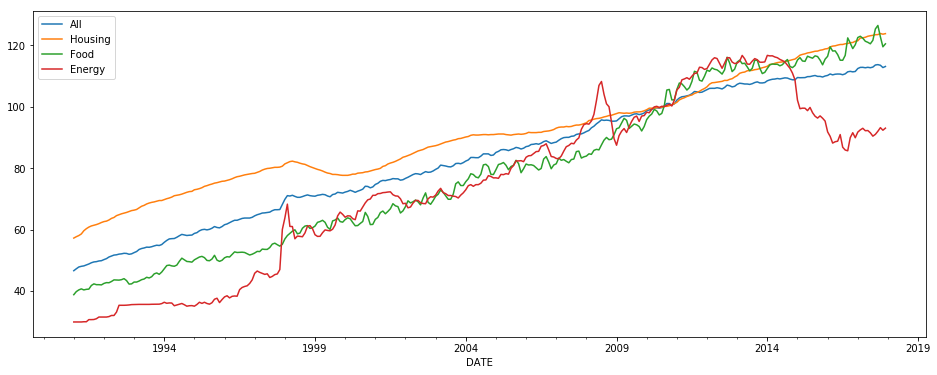

In [21]:
df_cpi.plot(figsize=(16,6))

# GDP
* 일정 기간 동안 한 국민 경제 내에서 생산된 최종재의 시장 가치
* Real GDP: 실질 GDP, 물가 인상분이 반영된 GDP
* Real GDP per Capita: 1인당 실질 GDP

https://research.stlouisfed.org/fred2/series/KORRGDPC
* KORRGDPR 한국 실질 GDP
* KORRGDPC 한국 Real GDP per Capita (1인당 실질 GDP)
* MKTGDPKRA646NWDB 한국 GDP
* MKTGDPCNA646NWDB 중국 GDP

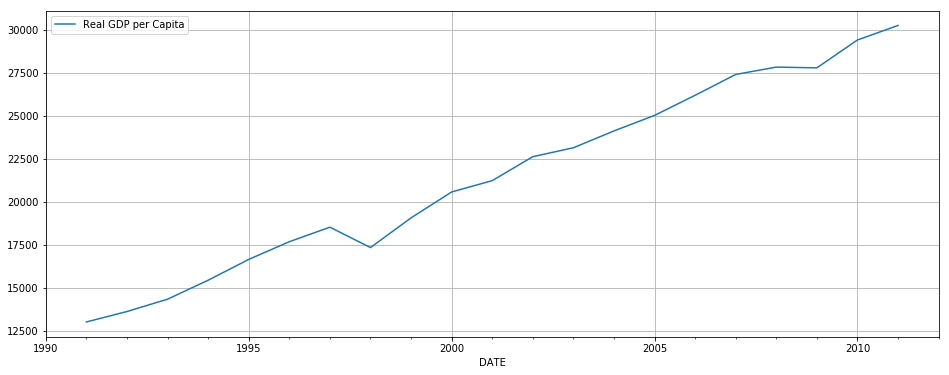

In [22]:
inx_codes = ['KORRGDPC']
inx_regend = ['Real GDP per Capita']

start = datetime.datetime(1991, 1, 1)
end = datetime.datetime(2017, 12, 31)

df_gdp = pdr.DataReader(inx_codes, 'fred', start, end)
df_gdp.columns = inx_regend
df_gdp.plot(figsize=(16,6), grid=True)

http://goo.gl/ecQprV 올해 1인당 국민소득 3만弗 육박…원화강세 등 효과 (2014-04-19)

# 실질 GDP,  1인당 실질 GDP 비교

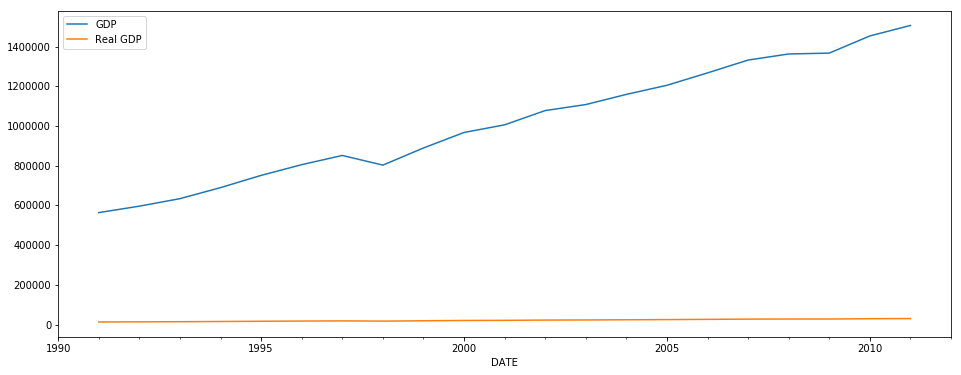

In [23]:
# KORRGDPR 실질 GDP,  KORRGDPC 1인당 실질 GDP
inx_codes = ['KORRGDPR', "KORRGDPC"]
inx_regend = ['GDP', "Real GDP"]

start = datetime.datetime(1991, 1, 1)
end = datetime.datetime(2017, 12, 31)

df_gdp = pdr.DataReader(inx_codes, 'fred', start, end)
df_gdp.columns = inx_regend
df_gdp.plot(figsize=(16,6))

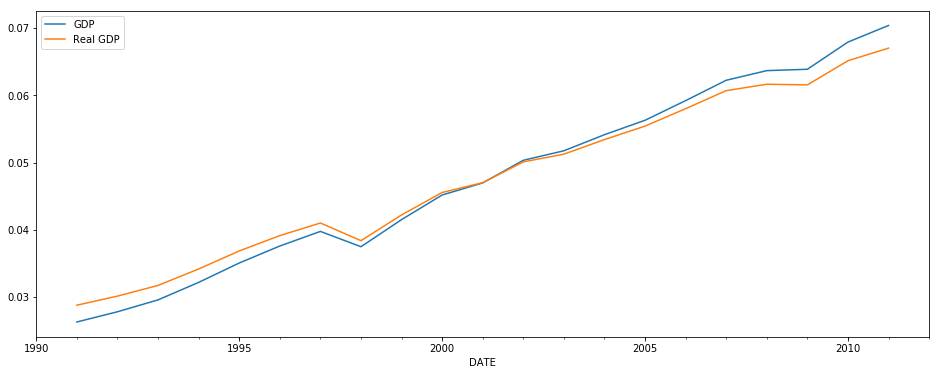

In [24]:
df_gdp_ratio = df_gdp / df_gdp.sum()
df_gdp_ratio.columns = inx_regend
df_gdp_ratio.plot(figsize=(16,6))

# GDP 대비 가계부채
* https://research.stlouisfed.org/fred2/series/HDTGPDKRQ163N
* "HDTGPDKRQ163N": Household Debt to GDP for Republic of Korea


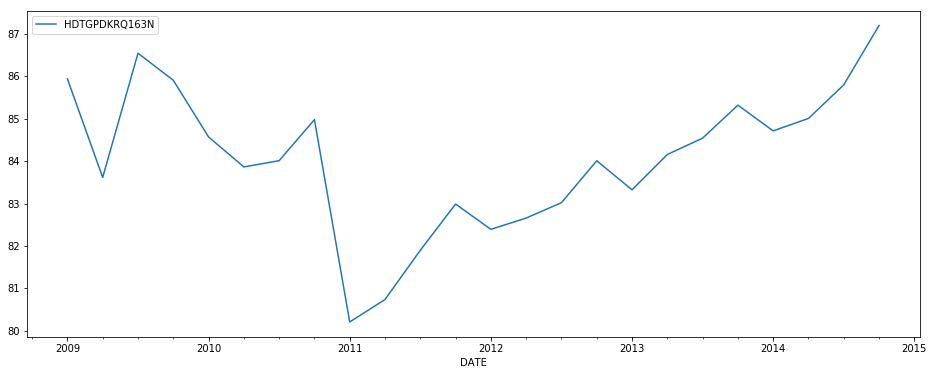

In [25]:
start = datetime.datetime(1991, 1, 1)
end = datetime.datetime(2017, 12, 31)

df_gdp_debt = pdr.DataReader(['HDTGPDKRQ163N'], 'fred', start, end)
df_gdp_debt.plot(figsize=(16,6))

http://goo.gl/9c7805 한국 GDP 대비 가계부채 비율 신흥국 최고 수준 (2015-09-15)

# 주요 통계 코드
* 한국 실제 GDP <br> https://research.stlouisfed.org/fred2/series/KORRGDPR
* 한국 1인당 실질 GDP (Real GDP per Capita) <br> https://research.stlouisfed.org/fred2/series/KORRGDPC
* 원달러 환율 (DEXKOUS) <br>  https://fred.stlouisfed.org/series/DEXKOUS
* 한국 GDP 대비 가계부채 Household Debt to GDP for Republic of Korea <br>  https://research.stlouisfed.org/fred2/series/HDTGPDKRQ163N
* 한국 실질실효환율 <br> https://research.stlouisfed.org/fred2/series/NNKRBIS
* 한국 소비자 물가지수(Consumer Price Index, CPI) <br> https://research.stlouisfed.org/fred2/series/KORCPIALLMINMEI

----
#### 2018 FinanceData http://fb.com/financedata http://financedata.github.com